<a href="https://colab.research.google.com/github/Covpet/Covpet/blob/main/Tutorial_5_Basic_Neural_Nets_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5 - Basic Neural Nets with Keras

In this tutorial, we will explore how to construct basic neural networks using the tf.keras package. Initially we will show how a very simple network can be constructed to perform a basic binary classification.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

# Exercise 1

First, create a simple dataset using the sklearn `make_blobs` function we saw in tutorial 1. It should have 2 centres, with 1000 data points, and a center box of `(-1,1)`. Plot the data in a scatter plot, using the labels to assign colours to the points. You want a dataset that has a small amount of overlap between the blobs, so if they are too seperated or too mixed together, try rerunning the code (You can also increase the size of the center box).

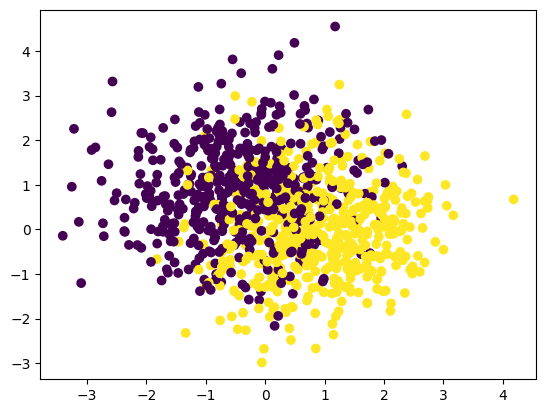

In [ ]:
### Create a blob dataset (see tutorial 1) with 1000 data points, 2 centers
### and center_box=(-1,1). Plot the data in a scatter plot with the labels
### as the data point colours.
# datasets.make_blobs, plt.scatter
from sklearn.datasets import make_blobs
x_train, y_train =  make_blobs(n_samples= 1000 , centers= 2 ,
                                       center_box= (-1,1))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

# Exercise 2

Before we construct a full model, it is useful to look at the individual components of a neural network, the layers. Using the `tf.kers.layers` create a `Dense` layer with 10 units, a `sigmoid` activation function, and an input shape of `(2,)`. The layer needs to be "built" so that we can fully inspect it. Call the `layer.build` method with input shape `(2,)`.

A `Dense` layer is a collection of fully connected neurons. Each neuron has a weight and a bias, which are stored inside the `layer.variables` attribute. Inspect the shape of the weights and bias variables of your layer. How do those shapes relate to the settings used to create the layer? What shape will the output of the layer have? Check if you are correct by printing the output of the `layer.compute_output_shape` method, with the input shape of `(None, 2)`. (This `None` axis represents the batches of data.)

In [ ]:
### Create a Dense layer with 10 units, sigmoid activation and input shape
### (2,)
# keras.layers.Dense

layer = keras.layers.Dense(units=10, activation="sigmoid", input_shape=(2,))

### Use the layer.build method to set up the layer weights
# layer.build
layer.build(input_shape=(2,))



In [ ]:
### Inspect the shapes of the weights and bias of the layer
# layer.variables
layer.variables


[<KerasVariable shape=(2, 10), dtype=float32, path=dense_2/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=dense_2/bias>]

In [ ]:
### Try to work out what the output shape will be, then check if you are correct
### by using the layer.compute_output_shape method
# layer.compute_output_shape
layer.compute_output_shape(input_shape=(None, 2))


(None, 10)

# Exercise 3

Next, you will construct a simple neural network using the "Sequential API". This creates a keras model which is composed of a single linear stack of layers. There are multiple ways to create a Sequential model, here you will use the keras.Sequential class, and provide a list of layers.

Your model will be composed of two `Dense` layers, one with 10 units, and one with 1 unit.

You can check the properties of your model with the `model.summary()` method. (Note, this only works if you define the input shape of the first layer.) How many traininable variables are there? How is this number calculated?

In [ ]:
### Create a sequential model with two Dense layers. The first layer should have
### 10 units, sigmoid activation and an input shape of (2,). The seocnd layer
### should have 1 unit and sigmoid activation.
# keras.Sequential, keras.layers.Dense

model = keras.Sequential(layers = [])
model.add(keras.layers.Dense(units=10, activation="sigmoid", input_shape=(2,)))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
### Inspect the model summary. How is the number of trainable variables calculated?
# model.summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

# Exercise 4

We need to train our model to correctly predict the class label for our dataset. To do that, the model must be compiled with an `optimizer` and `loss`. Use the `model.compile` method to set the `optimizer` to `"SGD"` and the `loss` to `"binary_crossentropy"`. You can also include `metrics=["accuracy"]` to measure the performance of the model.

You can then use the `model.fit` method to train the model. Train your model for 15-30 epochs (check to see if the accuracy stops improving), providing the blob data points as the `x` argument and the labels as the `y` argument.

In [ ]:
### Compile the model with "RMSprop" optimizer, "binary_crossentropy" loss, and
### ["accuracy"] metric.
# model.compile

model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
### Train the model for 15 epochs, using the blob data points and labels
# model.fit

model.fit(x= x_train, y= y_train, epochs= 15)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8015 - loss: 0.4729 
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.4824 
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.4929 
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7893 - loss: 0.4727 
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4734
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4690
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4569 
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7781 - loss: 0.4681 
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8022 - loss: 0.4389 
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.4415
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7702 - loss: 0.4961 
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7

# Exercise 5

We can now predict what the model thinks the label is for each of our data points. Use the `model.predict` method to calculate the model outputs for each of the data points. What do these numbers represent?

Plot the data points again, but this time use the predicted labels to assign the colours. Compare this plot with the true labels. What has the model learned from the data? Why does it fail to predict the data labels perfectly?

In [ ]:
### Use the model.predict method to calculate the outputs of the model.
### Print a subset of the results, what do these numbers represent?
### How would we relate them to the labels?
# model.predict

y_pred = model.predict(x_train)
print(y_pred[:10])


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[0.6370577 ]
 [0.09897288]
 [0.1821073 ]
 [0.1852876 ]
 [0.09333148]
 [0.22476555]
 [0.5744885 ]
 [0.65988153]
 [0.5082856 ]
 [0.39914468]]


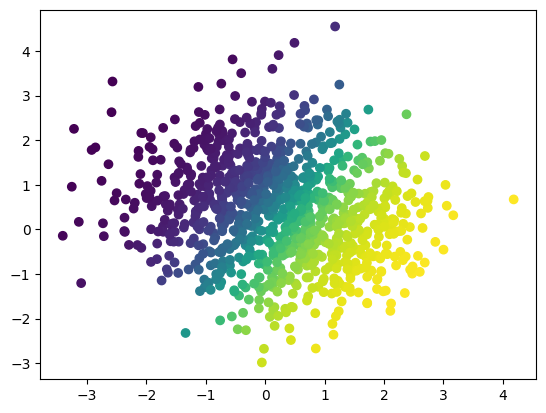

In [ ]:
### Plot the data points in a scatter plot, using the predicted output of the
### model for the colours. How does this differ from the ground truth?
# plt.scatter

plt.scatter(x_train[:,0],x_train[:,1],c=y_pred)

